In [1]:
import sys
sys.path.append("../")

In [4]:
import cv2 
from torchvision.datasets import MNIST, USPS
from matplotlib import pyplot as plt
import h5py
import numpy as np 
import os
from pathlib import Path

# LOAD DATA

In [5]:
# import h5py

# path = "usps.h5"
# with h5py.File(path, 'r') as hf:
#         train = hf.get('train')
#         X_tr = train.get('data')[:]
#         y_tr = train.get('target')[:]
#         test = hf.get('test')
#         X_te = test.get('data')[:]
#         y_te = test.get('target')[:]

In [17]:
def create_moving_digit(img, num_frames,step):
    moving_digit = []
    h = img.shape[0]
    g_h = h + (num_frames - 1)*step
    for i in range(num_frames):
        # ground_img = np.ones((g_h, g_h), dtype=np.float64)*255 # For white background
        ground_img = np.zeros((g_h, g_h), dtype=np.float64) # For black background
        ground_img[g_h - h - i*step: g_h - i*step, i*step:i*step+h] = img
        moving_digit.append(ground_img.copy())

    return np.array(moving_digit)

for x in range(100,101):
    usps = USPS("data", train=True, download=True)
    usps.targets = np.array(usps.targets)
    USPS_sample_all_class = [] 
    for i in range(10):
        image = usps.data[usps.targets == i][x]
        USPS_sample_all_class.append(image)

    mnist = MNIST("data", train=True, download=True)

    MNIST_sample_all_class = [] 
    for i in range(10):
        image = mnist.data[mnist.targets == i][x].numpy()
        MNIST_sample_all_class.append(image)
        
    mnist_path = Path(f"../Datasets/mnist_moving/{x}/")
    mnist_path.mkdir(parents=True, exist_ok=True)

    for number in range(len(MNIST_sample_all_class)):
        img = MNIST_sample_all_class[number]
        moving_digit = create_moving_digit(img, 20, 1)
        np.save(f"{str(mnist_path)}/{number}", moving_digit)

    usps_path = Path(f"../Datasets/usps_moving/{x}/")
    usps_path.mkdir(parents=True, exist_ok=True)

    for number in range(len(USPS_sample_all_class)):
        img = USPS_sample_all_class[number]
        moving_digit = create_moving_digit(img, 20, 1)
        np.save(f"{str(usps_path)}/{number}", moving_digit)

## USPS

In [133]:
# def sample_with_class(input: int):
#     ids = np.where(y_tr == input)[0]
#     ids = ids.reshape(ids.shape[0],)
#     rand_id = np.random.choice(ids)
    
#     return np.array(X_tr[rand_id].reshape(16, 16), dtype=np.float64)

# USPS_sample_all_class = [] 
# for i in range(10):
#     image = sample_with_class(i)
#     USPS_sample_all_class.append(image)
    
# #plot all classes
# plt.figure(figsize=(10,10))
# for i in range(10):
#     plt.subplot(1,10,i+1)
#     plt.imshow(USPS_sample_all_class[i], cmap="gray")
#     plt.axis("off")
    
# print("SHAPE: ", USPS_sample_all_class[0].shape)

SHAPE:  (16, 16)


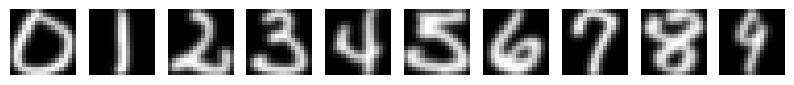

In [48]:
x = 0

usps = USPS("data", train=True, download=True)
usps.targets = np.array(usps.targets)
USPS_sample_all_class = [] 
for i in range(10):
    image = usps.data[usps.targets == i][x]
    USPS_sample_all_class.append(image)
    
#plot all classes
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(USPS_sample_all_class[i], cmap="gray")
    plt.axis("off")

print("SHAPE: ", USPS_sample_all_class[0].shape)

## MNIST

SHAPE:  (28, 28)


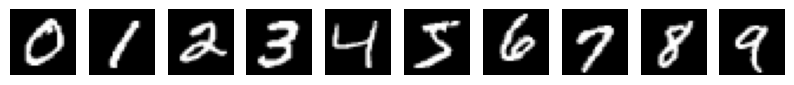

In [54]:
x =0
mnist = MNIST("data", train=True, download=True)

MNIST_sample_all_class = [] 
for i in range(10):
    image = mnist.data[mnist.targets == i][x].numpy()
    MNIST_sample_all_class.append(image)
    
#plot all classes
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(MNIST_sample_all_class[i], cmap="gray")
    plt.axis("off")

print("SHAPE: ", MNIST_sample_all_class[0].shape)

# CREATE MOVING DIGIT DATASET

In [55]:
def create_moving_digit(img, num_frames,step):
    moving_digit = []
    h = img.shape[0]
    g_h = h + (num_frames - 1)*step
    for i in range(num_frames):
        # ground_img = np.ones((g_h, g_h), dtype=np.float64)*255 # For white background
        ground_img = np.zeros((g_h, g_h), dtype=np.float64) # For black background
        ground_img[g_h - h - i*step: g_h - i*step, i*step:i*step+h] = img
        moving_digit.append(ground_img.copy())

    return np.array(moving_digit)

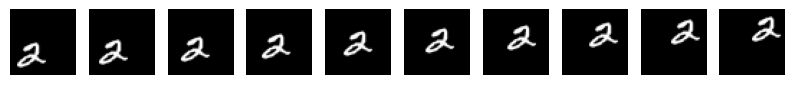

In [56]:
test_img = MNIST_sample_all_class[2]
test_mnist_moving = create_moving_digit(test_img, 10, 2)

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(test_mnist_moving[i], cmap="gray")
    plt.axis("off")

In [57]:
n_frame = 10

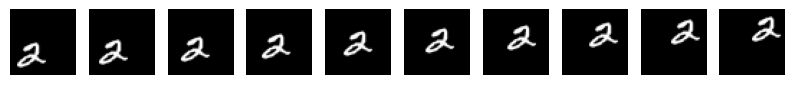

In [58]:
test_img = MNIST_sample_all_class[2]
test_mnist_moving = create_moving_digit(test_img, n_frame, 2)

plt.figure(figsize=(n_frame,n_frame))
for i in range(n_frame):
    plt.subplot(1,n_frame,i+1)
    plt.imshow(test_mnist_moving[i], cmap="gray")
    plt.axis("off")

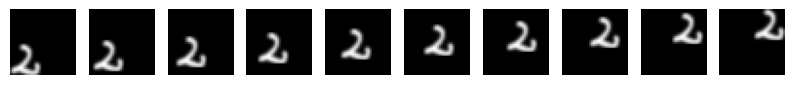

In [59]:
test_img = USPS_sample_all_class[2]
test_usps_moving = create_moving_digit(test_img, n_frame, 2)

plt.figure(figsize=(n_frame,n_frame))
for i in range(n_frame):
    plt.subplot(1,n_frame,i+1)
    plt.imshow(test_usps_moving[i], cmap="gray")
    plt.axis("off")

In [45]:
np.save( "../Datasets/test_long_moving/2_usps",test_usps_moving)

In [46]:
np.save( "../Datasets/test_long_moving/2_mmnist",test_mnist_moving)

### Warning

In [138]:
mnist_path = Path(f"../Datasets/mnist_moving/{x}/")
mnist_path.mkdir(parents=True, exist_ok=True)

for number in range(len(MNIST_sample_all_class)):
    img = MNIST_sample_all_class[number]
    moving_digit = create_moving_digit(img, 20, 1)
    np.save(f"{str(mnist_path)}/{number}", moving_digit)

In [139]:
usps_path = Path(f"../Datasets/usps_moving/{x}/")
usps_path.mkdir(parents=True, exist_ok=True)

for number in range(len(USPS_sample_all_class)):
    img = USPS_sample_all_class[number]
    moving_digit = create_moving_digit(img, 20, 1)
    np.save(f"{str(usps_path)}/{number}", moving_digit)

### Sample

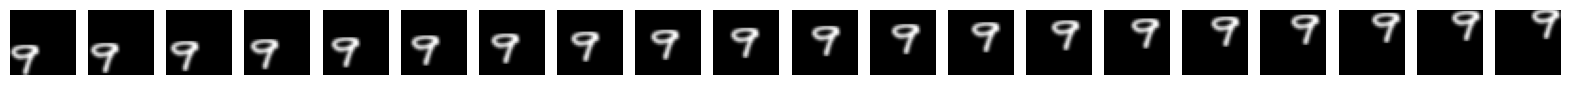

In [12]:
frame_per_vid = 20
path = "../Datasets/usps_moving/42"
# path = "../Datasets/usps_moving"
vid_9 = np.load(f"{path}/9.npy")
plt.figure(figsize=(frame_per_vid,frame_per_vid))
for i in range(frame_per_vid):
    plt.subplot(1,frame_per_vid,i+1)
    plt.imshow(vid_9[i], cmap="gray")
    plt.axis("off")

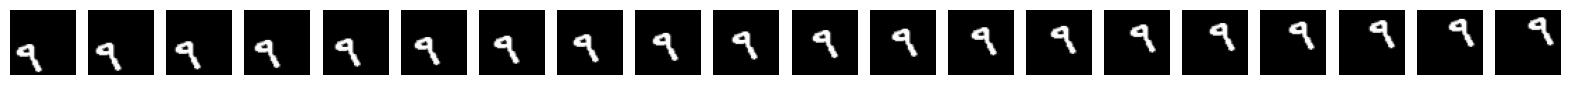

In [16]:
frame_per_vid = 20
path = "../Datasets/mnist_moving/47"
# path = "../Datasets/usps_moving"
vid_9 = np.load(f"{path}/9.npy")
plt.figure(figsize=(frame_per_vid,frame_per_vid))
for i in range(frame_per_vid):
    plt.subplot(1,frame_per_vid,i+1)
    plt.imshow(vid_9[i], cmap="gray")
    plt.axis("off")